# Lab 5: Project (Ensemble ML, Spiral)

## Lab 5: Ensemble Machine Learning – Wine Dataset
Author: Priyanka Naskar

Date: 4/11/25

In this project, we learn how to implement and evaluate more complex models when simpler techniques aren't enough. We'll explore ensemble models, a powerful approach in machine learning that combines multiple models to improve performance. Ensemble methods often outperform individual models by reducing overfitting and improving generalization

## Introduction to Ensemble Models

Ensemble models combine the outputs of multiple models to improve predictive performance. Common types of ensemble models include:

Boosted Decision Trees – Models train sequentially, with each new tree correcting the errors of the previous one.
Random Forest – Multiple decision trees train in parallel, each on a random subset of the data, and their predictions are averaged.
Voting Classifier (Heterogeneous Models) – Combines different types of models (e.g., Decision Tree, SVM, and Neural Network) by taking the majority vote or average prediction.
Cross Validation – Divides data into multiple folds to improve the reliability of performance estimates.

### Performance Metrics

We will evaluate model performance using the following metrics:

Accuracy –  The proportion of all predictions that are correct.
Precision – Proportion of positive predictions that are truly positive.
Recall – Proportion of actual positives that are correctly predicted.
F1 Score – Harmonic mean of precision and recall, balancing both.

## Imports Libraries

In [1]:

# ------------------------------------------------
# Imports once at the top, organized
# ------------------------------------------------

import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

### Some colors used in this notebook were selected from the following color collection: 

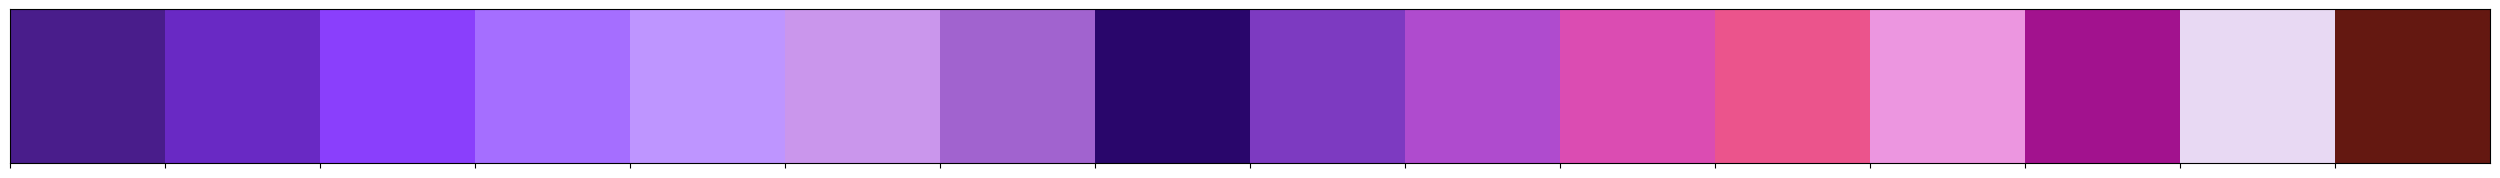

In [2]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)

## Section 1. Load and Inspect the Data

In [3]:
# Load the dataset (download from UCI and save in the same folder)
df = pd.read_csv("winequality-red.csv", sep=";")

In [4]:
# Display structure and first few rows
df.info()
df.head().style.background_gradient(cmap = "Purples_r")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


### 1.2 | Descriptive Statistics of Numeric Variables

In [5]:
df.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


## Section 2. Prepare the Data

Includes cleaning, feature engineering, encoding, splitting, helper functions

In [6]:
# Define helper function that:

# Takes one input, the quality (which we will temporarily name q while in the function)
# And returns a string of the quality label (low, medium, high)
# This function will be used to create the quality_label column
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

In [7]:
# Call the apply() method on the quality column to create the new quality_label column
df["quality_label"] = df["quality"].apply(quality_to_label)

In [8]:
def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2


In [9]:
df["quality_numeric"] = df["quality"].apply(quality_to_number)

In [10]:
df["quality_numeric"].value_counts().sort_index()


quality_numeric
0      63
1    1319
2     217
Name: count, dtype: int64

In [11]:
# Display updated DataFrame
print("\nUpdated Dataset Sample:")
print(df[["quality", "quality_label", "quality_numeric"]].head())


Updated Dataset Sample:
   quality quality_label  quality_numeric
0        5        medium                1
1        5        medium                1
2        5        medium                1
3        6        medium                1
4        5        medium                1


### What This Does:
This line creates a new column in the DataFrame called quality_numeric.

It applies the quality_to_number() function to each value in the quality column.

###  Result:
Your dataset now has a new column (quality_numeric) with values 0, 1, or 2, making it ready for model training.

You can now use quality_numeric as your target variable (y) for classification models.

## Section 3. Feature Selection and Justification

### Select Dependent and Independent Variables

In [12]:
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])


In [13]:
y = df["quality_numeric"]


We're using quality_numeric (0 = low, 1 = medium, 2 = high) as the target variable because:

It is in a numerical format, which is what machine learning models require.

It represents the transformed wine quality category, which is what we’re trying to predict.

## Section 4. Split the Data into Train and Test

### Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Section 5: Evaluate Model Performance

### Helper function


In [15]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Train F1": train_f1,
            "Test F1": test_f1,
        }
    )

In [16]:
results = []

In [17]:
# 4. AdaBoost (200, lr=0.5) 
evaluate_model(
    "AdaBoost (200, lr=0.5)",
    AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)


AdaBoost (200, lr=0.5) Results
Confusion Matrix (Test):
[[  1  12   0]
 [  2 255   7]
 [  0  25  18]]
Train Accuracy: 0.8397, Test Accuracy: 0.8562
Train F1 Score: 0.8160, Test F1 Score: 0.8330


In [18]:
# 5. Gradient Boosting
evaluate_model(
    "Gradient Boosting (100)",
    GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    ),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)



Gradient Boosting (100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  3 247  14]
 [  0  16  27]]
Train Accuracy: 0.9601, Test Accuracy: 0.8562
Train F1 Score: 0.9584, Test F1 Score: 0.8411


## Section 6: Compare Results

In [19]:
# Convert results list into a DataFrame
results_df = pd.DataFrame(results)

# Add a Generalization Gap column (Train Accuracy - Test Accuracy)
results_df["Generalization Gap"] = results_df["Train Accuracy"] - results_df["Test Accuracy"]

# Sort the table by Test Accuracy (descending)
results_df_sorted = results_df.sort_values(by="Test Accuracy", ascending=False)

# Display the enhanced summary
print("\n📋 Summary of All Models (Sorted by Test Accuracy):")
display(results_df_sorted)


📋 Summary of All Models (Sorted by Test Accuracy):


,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Generalization Gap
0,"AdaBoost (200, lr=0.5)",0.839719,0.85625,0.815964,0.832962,-0.016531
1,Gradient Boosting (100),0.960125,0.85625,0.958410,0.841106,0.103875


*Why Add the Gap?*

The generalization gap tells you how well a model performs on unseen data:

Small gap = model generalizes well.

Large gap = potential overfitting (model performs much better on train than test set).



### Section 7. Conclusions and Insights

As part of the ensemble modeling phase for the red wine quality classification project, we introduced AdaBoost, a boosting algorithm known for converting weak learners into strong predictors. The goal was to evaluate how AdaBoost performs compared to other ensemble methods like Random Forest and Gradient Boosting.

### Insights & Recommendations
Both AdaBoost models performed solidly, but tuning the parameters gave a slight edge in performance.

The generalization gap remained similar in both versions, suggesting neither model drastically overfit the data.

AdaBoost with more estimators and lower learning rate was slightly better on the test set, making it a better candidate for production or further tuning.



### Refrence Notebook: https://github.com/Crusoe22/applied-ml-moss/tree/main/lab05

*Thank you*